1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

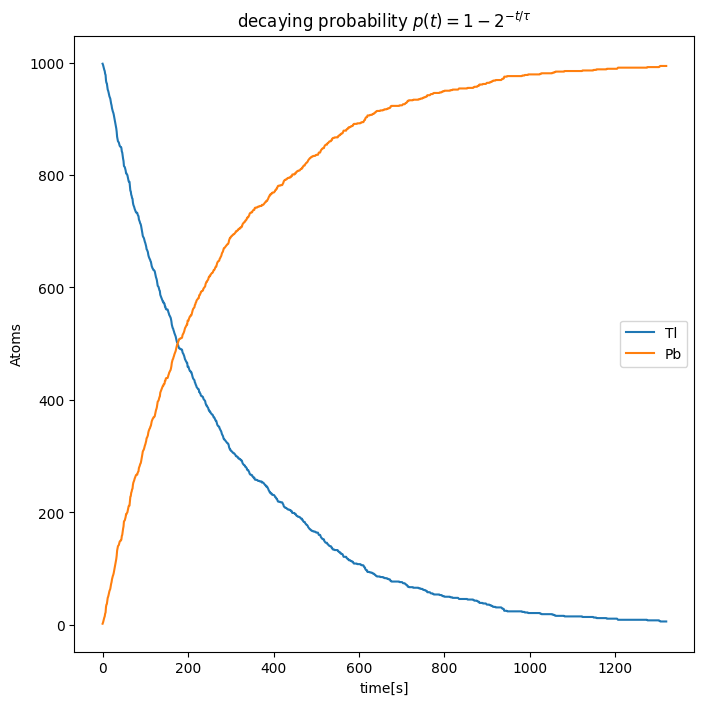

In [28]:
########## point 1: successive subtractions ##########

Tl = 1000 # atoms of Thallium
Pb = 0 # atoms of Lead

tau = 3.052*60/np.log(2) # half life in seconds
obWnd = int(5*tau) # observation window

ev_Tl = [0]*obWnd # track the evolution in time of Thallium 
ev_Tl[0] = Tl

ev_Pb = [0]*obWnd # track the evolution in time of Lead 
ev_Pb[0] = Pb

time = range(0, obWnd)

for t in time:
    prob = 1/tau
    dec = np.random.choice([True, False], size=Tl, p=[prob, 1-prob]) # throw a coin for each atom with pribability prob and 1-prob
    dec = np.count_nonzero(dec) # number of decayed atoms in this timeframe
    Tl = Tl-dec
    Pb = Pb+dec
    ev_Tl[t] = Tl
    ev_Pb[t] = Pb

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
ax.set_title("decaying probability $p(t)=1-2^{-t/\\tau}$")
ax.plot(time, ev_Tl, label='Tl')
ax.plot(time, ev_Pb, label='Pb')
ax.legend()
ax.set_xlabel('time[s]')
ax.set_ylabel('Atoms')
fig.show()


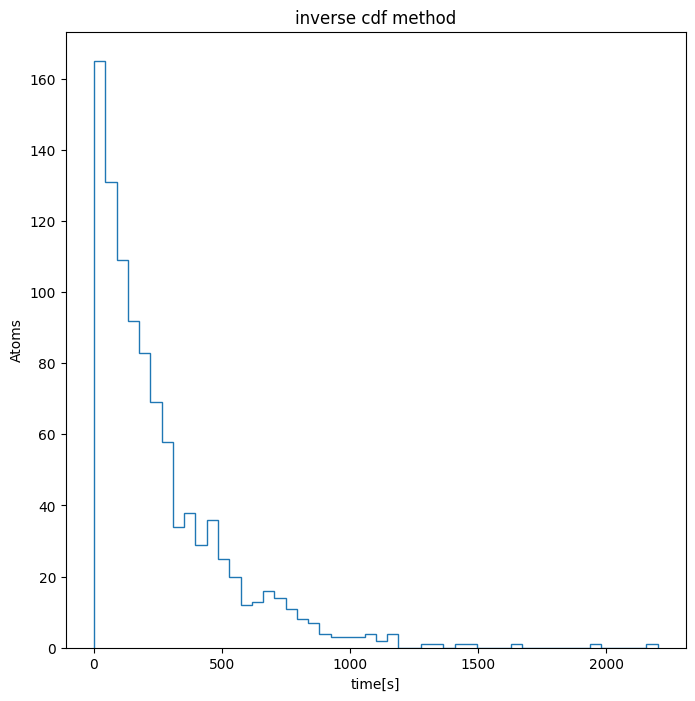

In [41]:
########## point 2: inverse transform ##########
Tl = 1000 # atoms of Thallium
Pb = 0 # atoms of Lead

tau = 3.052*60 # half life in seconds
obWnd = int(5*tau) # observation window

def inverse_cdf(t, tau):
    return -np.log2(1-t)*tau

cdf = np.random.random(1000)
times = inverse_cdf(cdf, tau)

fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
ax.set_title("inverse cdf method")
ax.hist(times, bins=50, histtype='step')
ax.set_xlabel('time[s]')
ax.set_ylabel('Atoms')
fig.show()


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

hit/miss method returns:
	mean of results: 1.349 +- 0.009
mean value method returns:
	mean of results: 1.347 +- 0.007


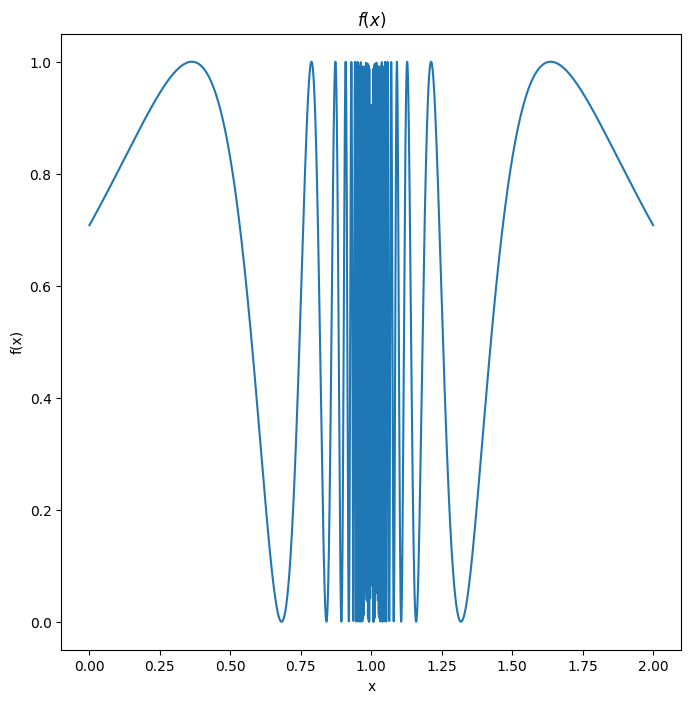

In [58]:
def f(x):
    return (np.sin(1/(1-x)))**2

x = np.linspace(0,2,5000)
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
ax.set_title("$f(x)$")
ax.plot(x, f(x))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
fig.show()

def hm(N=10000, count=0):
    a, b, h = 0, 1, 2
    for i in range(N):
        x = h * np.random.random() # x is random uniform between 0 and 2
        y = (b - a) * np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I = count / N * h * (b - a)
    return I

def mv(N=10000):
    xi = np.random.uniform(0, 2, N)
    yi = np.array([f(xii) for xii in xi])
    s = np.sum(yi)
    I = 2/N*s
    return I
    

results_hm = []
n = 100 # iterations of the integral computation
for i in range(n):
    results_hm.append(hm())

mean_hm = np.mean(results_hm)
stddev_hm = np.std(results_hm)
print("hit/miss method returns:")
print("\tmean of results: %.3f +- %.3f" %(mean_hm, stddev_hm))

results_mv = []
n = 100 # iterations of the integral computation
for i in range(n):
    results_mv.append(mv())
    
mean_mv = np.mean(results_mv)
stddev_mv = np.std(results_mv)
print("mean value method returns:")
print("\tmean of results: %.3f +- %.3f" %(mean_mv, stddev_mv))

    

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.